# Task 1

### Create students data frame in Pandas by creating one data frame that consist of merged information given in data set student-mat and student-por. Change the names of selected columns if needed.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

current_dir = os.getcwd()
student_mat_path = os.path.join(current_dir, 'student+performance', 'student', 'student-mat.csv')
student_por_path = os.path.join(current_dir, 'student+performance', 'student', 'student-por.csv')

student_mat = pd.read_csv(student_mat_path, sep=';')
student_por = pd.read_csv(student_por_path, sep=';')

merge_columns = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
]

students_df = pd.merge(student_mat, student_por, on=merge_columns, suffixes=('_math', '_por'))
print(students_df.head(5))

total_rows = len(students_df)
print(f"Total number of rows: {total_rows}")

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel_por freetime_por  goout_por  Dalc_por  Walc_por health_por  \
0          4            3          4         1         1          3   
1          5            3          3         1         1          3   
2          4            3          2         2         3          3   
3          3            2          2         1         1          5   
4          4            3          2         1         2          5   

  absences_por G1_por G2_por G3_por  
0            4      0     11     11  
1         

# Task 2

### 1. Create a two new features which will convert final grades from math and portugal class to scale Polish grade system, i.e. {2, 3, 3.5, 4, 4.5, 5} according to following conversion table, provided by the task.

In [2]:
def to_polish_grading(grade, max_grade):
    percentage = (grade / max_grade) * 100
    if percentage <= 50:
        return 2
    elif percentage <= 60:
        return 3
    elif percentage <= 70:
        return 3.5
    elif percentage <= 80:
        return 4
    elif percentage <= 90:
        return 4.5
    else:
        return 5

max_G3_math = students_df['G3_math'].max()
max_G3_por = students_df['G3_por'].max()

students_df['G3_math_polgrd'] = students_df['G3_math'].apply(to_polish_grading, max_grade=max_G3_math)
students_df['G3_por_polgrd'] = students_df['G3_por'].apply(to_polish_grading, max_grade=max_G3_por)

print(students_df.head(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  goout_por Dalc_por  Walc_por  health_por  absences_por G1_por G2_por G3_por  \
0         4        1         1           3             4      0     11     11   
1         3        1         1           3             2      9     11     11   
2         2        2         3           3             6     12     13     12   
3         2        1         1           5             0     14     14     14   
4         2        1         2           5             0     11     13     13   

  G3_math_polgrd G3_por_po

Now that we've converted the grades to the Polish grading format for better understanding, we can visualize the overall group performance with two pie charts — one for Math and one for Portuguese.

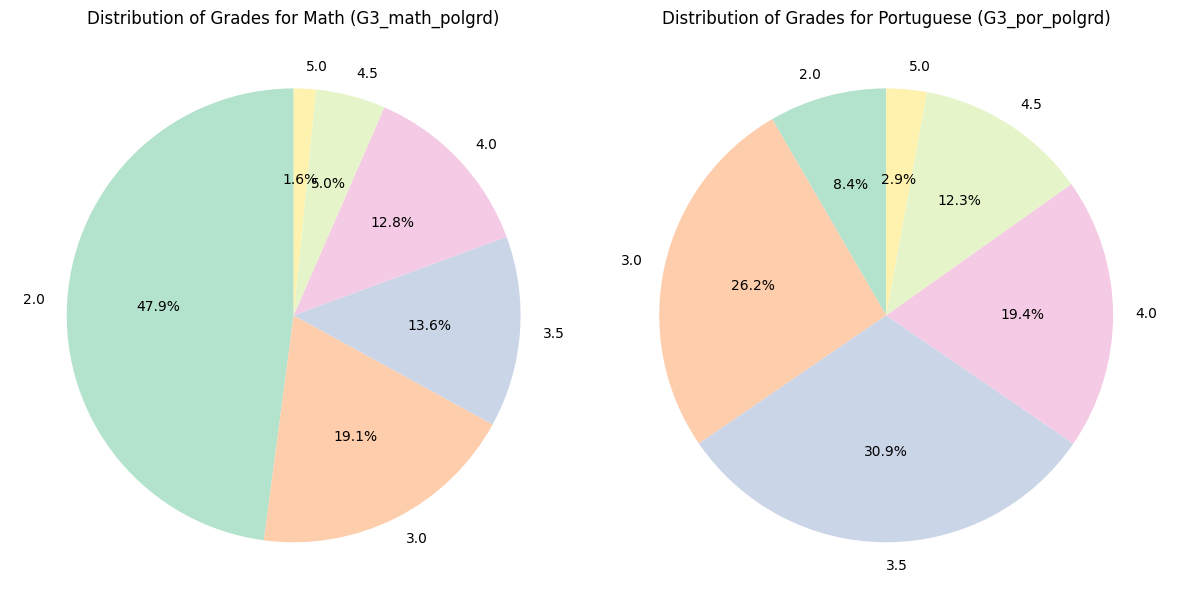

In [3]:
math_grade_counts = students_df['G3_math_polgrd'].value_counts().sort_index()
por_grade_counts = students_df['G3_por_polgrd'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(math_grade_counts, labels=math_grade_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title("Distribution of Grades for Math (G3_math_polgrd)")

plt.subplot(1, 2, 2)
plt.pie(por_grade_counts, labels=por_grade_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title("Distribution of Grades for Portuguese (G3_por_polgrd)")

plt.tight_layout()
plt.show()

While Math has a high failure rate (47.9%), Portuguese has a much lower failure rate (8.4%). The percentage of students achieving the highest grade (5.0) is quite similar in both subjects, with Math at 1.6% and Portuguese at 2.9%, suggesting that the group of top-performing students might remain pretty consistent across both subjects.

### 2. See how the amount of free time after school affects students performance by calculating minimum, maximum, median and average of the final grade in groups determined by the amount of free time after school.

From this point onward, I treat student performance as the final grade for the class, which is converted to the Polish grading scale ('G3_math_polgrd', 'G3_por_polgrd').

In [4]:
freetime_performance_math = students_df.groupby('freetime_math')['G3_math_polgrd'].agg(['min', 'max', 'median', 'mean'])
print("Math Performance Based on Free Time:")
print(freetime_performance_math)

freetime_performance_por = students_df.groupby('freetime_por')['G3_por_polgrd'].agg(['min', 'max', 'median', 'mean'])
print("\nPortuguese Performance Based on Free Time:")
print(freetime_performance_por)

Math Performance Based on Free Time:
               min  max  median      mean
freetime_math                            
1              2.0  4.5     2.0  2.527778
2              2.0  5.0     3.0  3.104839
3              2.0  5.0     2.0  2.737179
4              2.0  5.0     2.0  2.770642
5              2.0  5.0     3.0  3.013514

Portuguese Performance Based on Free Time:
              min  max  median      mean
freetime_por                            
1             2.0  5.0     3.5  3.382353
2             2.0  5.0     3.5  3.733871
3             2.0  5.0     3.5  3.515924
4             2.0  4.5     3.5  3.467593
5             2.0  5.0     3.0  3.263158


No clear dependency between free time and performance can be seen. Math shows more variation, with mean grades slightly increasing from 2.53 to 3.01 (with performance at 'low' (2) free time being higher than at 'very high' (5) free time). It is also notable that the maximum, mean, and median grades of students with 'very low' (1) free time are the lowest, suggesting potential consequences of overworking.  
Portuguese remains stable, with mean grades between 3.26 and 3.73 and median grades around 3.5, though there is a slight decrease (3.0) at 'very high' free time. Max is a bit lower (4.5) for students with 'high' (4) free time.

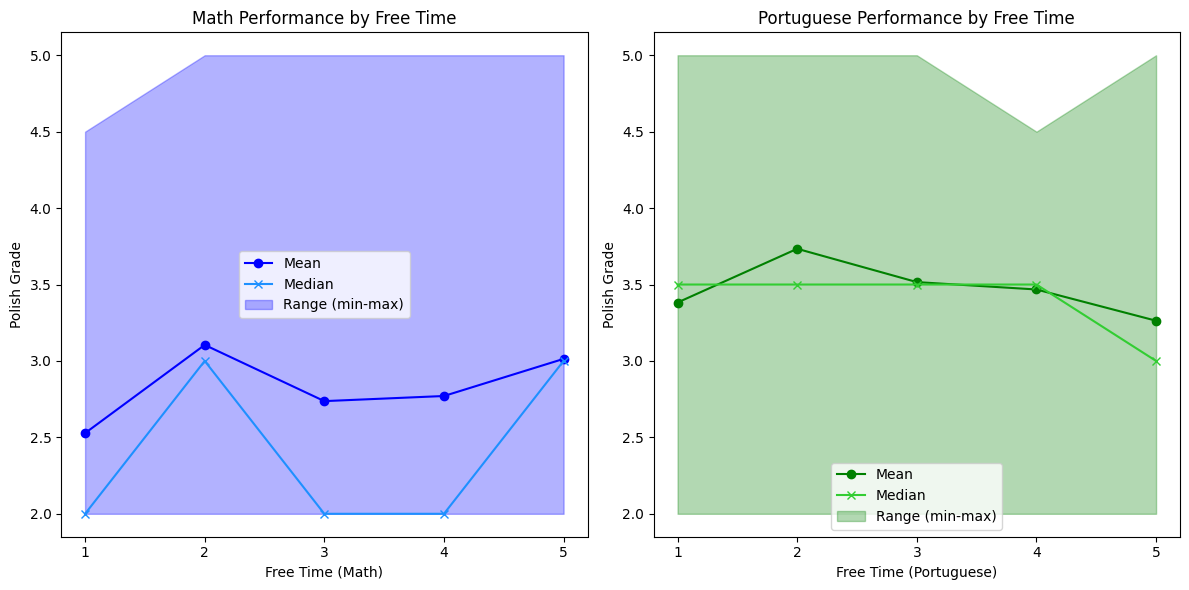

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(freetime_performance_math.index, freetime_performance_math['mean'], marker='o', label='Mean', color='blue')
plt.plot(freetime_performance_math.index, freetime_performance_math['median'], marker='x', label='Median', color='dodgerblue')
plt.fill_between(freetime_performance_math.index, freetime_performance_math['min'], freetime_performance_math['max'], color='blue', alpha=0.3, label='Range (min-max)')
plt.title('Math Performance by Free Time')
plt.xlabel('Free Time (Math)')
plt.ylabel('Polish Grade')
plt.legend()
plt.locator_params(axis='x', nbins=5)

plt.subplot(1, 2, 2)
plt.plot(freetime_performance_por.index, freetime_performance_por['mean'], marker='o', label='Mean', color='green')
plt.plot(freetime_performance_por.index, freetime_performance_por['median'], marker='x', label='Median', color='limegreen')
plt.fill_between(freetime_performance_por.index, freetime_performance_por['min'], freetime_performance_por['max'], color='green', alpha=0.3, label='Range (min-max)')
plt.title('Portuguese Performance by Free Time')
plt.xlabel('Free Time (Portuguese)')
plt.ylabel('Polish Grade')
plt.legend()
plt.locator_params(axis='x', nbins=5)

plt.tight_layout()
plt.show()

### 3. Calculate the correlation between number of past class failures and the number of school absences.

In [6]:
failures_absences_math = students_df['failures_math'].corr(students_df['absences_math'])
failures_absences_por = students_df['failures_por'].corr(students_df['absences_por'])


print("Math Students: Overall Failures and Absences Correlation:", failures_absences_math)
print("Portuguese Students: Overall Failures and Absences Correlation:", failures_absences_por)

Math Students: Overall Failures and Absences Correlation: 0.01724612032837424
Portuguese Students: Overall Failures and Absences Correlation: 0.08200280024354532


Correlation strength ranges from -1 to +1. Math Students show almost zero correlation between failures and absences. For Portuguese Students, a weak positive correlation hints that missing classes may slightly increase the risk of failing.

Let's visualize this relationship using scatter plots, comparing how these variables interact in each group:

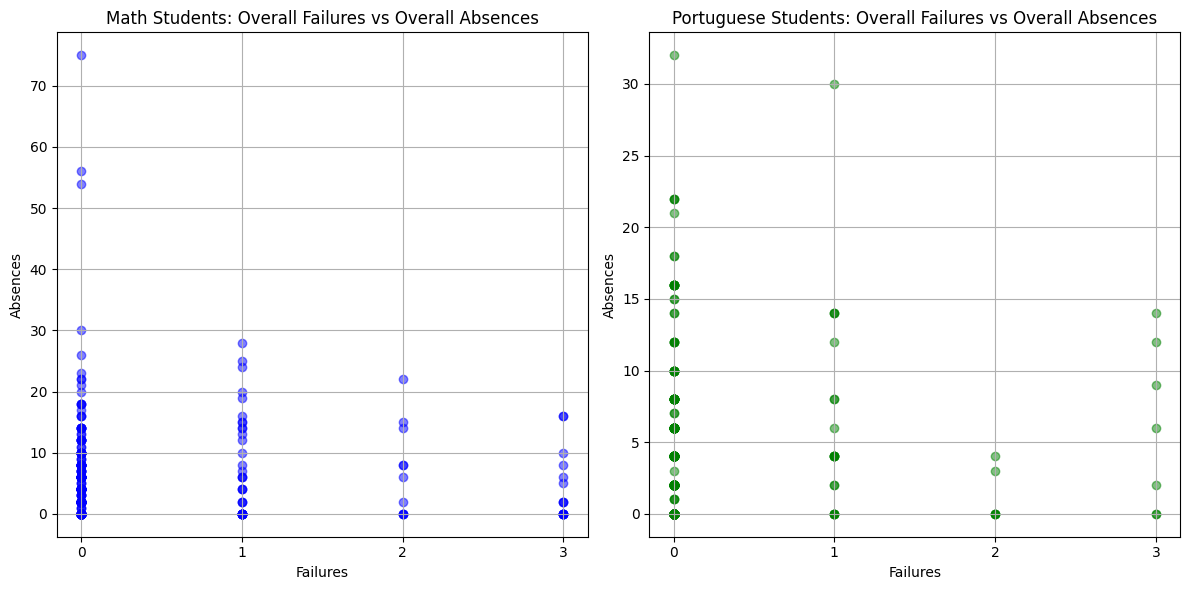

In [7]:
plt.figure(figsize=(12, 6)) 

plt.subplot(1, 2, 1)
plt.scatter(students_df['failures_math'], students_df['absences_math'], color='blue', alpha=0.5)
plt.title("Math Students: Overall Failures vs Overall Absences")
plt.xlabel("Failures")
plt.ylabel("Absences")
plt.grid(True)
plt.locator_params(axis='x', nbins=4)

plt.subplot(1, 2, 2)
plt.scatter(students_df['failures_por'], students_df['absences_por'], color='green', alpha=0.5)
plt.title("Portuguese Students: Overall Failures vs Overall Absences")
plt.xlabel("Failures")
plt.ylabel("Absences")
plt.grid(True)
plt.locator_params(axis='x', nbins=4)

plt.tight_layout()
plt.show()

# Task 3

### 1. How health status of a student and quality of his/her family life influence the overall performance of the students?

I will use min, max, median, and mean to capture the extremes, central tendency, and overall trends in performance.  
Let's examine how health AND family relationships affect student performance:

In [8]:
health_famrel_performance_math = students_df.groupby(['health_math', 'famrel_math'])['G3_math_polgrd'].agg(['min', 'max', 'median', 'mean']).reset_index()

health_famrel_performance_math = health_famrel_performance_math.pivot_table(
    index='health_math', 
    columns='famrel_math', 
    values=['min', 'max', 'median', 'mean']
)

print("Math Performance Based on Health and Family Relationship:")
print(health_famrel_performance_math)

health_famrel_performance_por = students_df.groupby(['health_por', 'famrel_por'])['G3_por_polgrd'].agg(['min', 'max', 'median', 'mean']).reset_index()

health_famrel_performance_por = health_famrel_performance_por.pivot_table(
    index='health_por', 
    columns='famrel_por', 
    values=['min', 'max', 'median', 'mean']
)

print("\n\nPortuguese Performance Based on Health and Family Relationship:")
print(health_famrel_performance_por)

Math Performance Based on Health and Family Relationship:
             max                      mean                                \
famrel_math    1    2    3    4    5     1         2         3         4   
health_math                                                                
1            4.0  4.0  4.0  5.0  5.0  3.50  4.000000  2.714286  3.083333   
2            NaN  4.0  4.5  5.0  4.0   NaN  2.666667  2.937500  2.931818   
3            3.0  4.5  5.0  4.0  4.0  3.00  2.900000  2.636364  2.641026   
4            NaN  3.0  4.5  4.5  5.0   NaN  2.250000  3.000000  2.683333   
5            3.0  4.0  4.0  4.5  4.5  2.25  3.500000  2.736842  2.743243   

                      median                       min                      
famrel_math         5      1    2     3    4    5    1    2    3    4    5  
health_math                                                                 
1            3.200000    3.5  4.0  2.00  3.0  3.5  3.0  4.0  2.0  2.0  2.0  
2            2.550000    

First of all, it can be observed that the dataset does not include any students with both 'low' (2) health and 'very low' (1) family relationship, nor any students with 'high' (4) health and 'very low' (1) family relationship.  

Let's examine how health affect student performance:

In [9]:
health_performance_math = students_df.groupby('health_math')['G3_math_polgrd'].agg(['min', 'max', 'median', 'mean'])
print("Math Performance Based on Health:")
print(health_performance_math)

health_performance_por = students_df.groupby('health_por')['G3_por_polgrd'].agg(['min', 'max', 'median', 'mean'])
print("\nPortuguese Performance Based on Health:")
print(health_performance_por)

Math Performance Based on Health:
             min  max  median      mean
health_math                            
1            2.0  5.0     3.5  3.141304
2            2.0  5.0     2.0  2.825581
3            2.0  5.0     2.0  2.656627
4            2.0  5.0     2.0  2.765625
5            2.0  4.5     3.0  2.842466

Portuguese Performance Based on Health:
            min  max  median      mean
health_por                            
1           2.0  5.0     4.0  3.663043
2           2.0  5.0     3.5  3.704545
3           2.0  5.0     3.5  3.518072
4           2.0  5.0     3.5  3.572581
5           2.0  5.0     3.5  3.363946


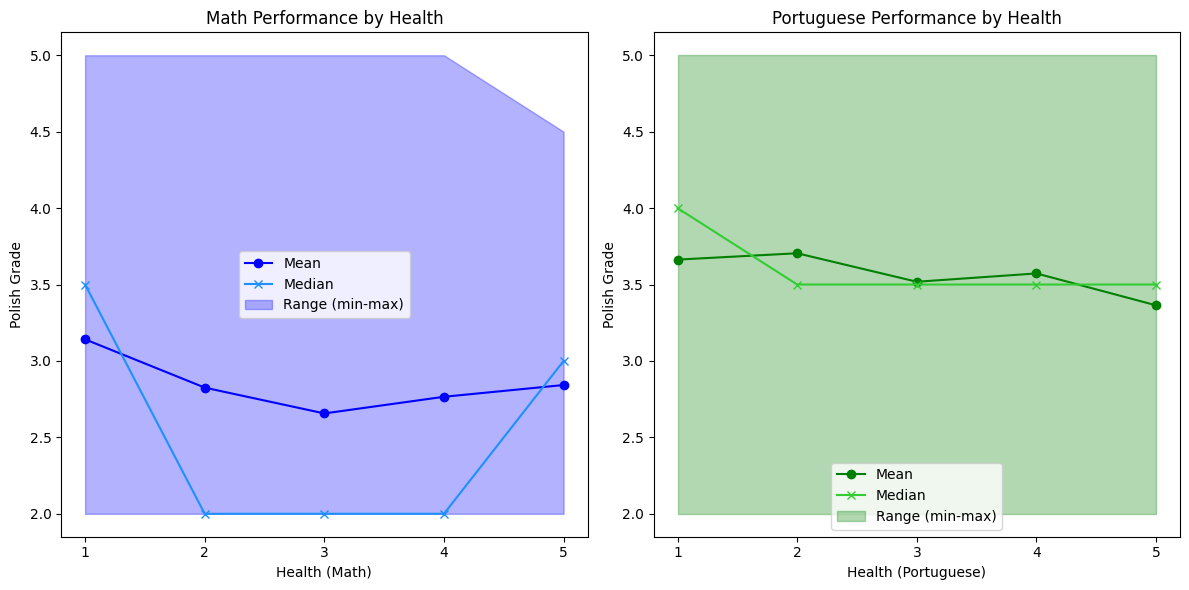

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(health_performance_math.index, health_performance_math['mean'], marker='o', label='Mean', color='blue')
plt.plot(health_performance_math.index, health_performance_math['median'], marker='x', label='Median', color='dodgerblue')
plt.fill_between(health_performance_math.index, health_performance_math['min'], health_performance_math['max'], color='blue', alpha=0.3, label='Range (min-max)')
plt.title('Math Performance by Health')
plt.xlabel('Health (Math)')
plt.ylabel('Polish Grade')
plt.legend()
plt.locator_params(axis='x', nbins=5)

plt.subplot(1, 2, 2)
plt.plot(health_performance_por.index, health_performance_por['mean'], marker='o', label='Mean', color='green')
plt.plot(health_performance_por.index, health_performance_por['median'], marker='x', label='Median', color='limegreen')
plt.fill_between(health_performance_por.index, health_performance_por['min'], health_performance_por['max'], color='green', alpha=0.3, label='Range (min-max)')
plt.title('Portuguese Performance by Health')
plt.xlabel('Health (Portuguese)')
plt.ylabel('Polish Grade')
plt.legend()
plt.locator_params(axis='x', nbins=5)

plt.tight_layout()
plt.show()

No clear dependency between health and performance can be seen. The peak median of 3.5 in Math for students in 'very bad' (1) health could suggest they might be sacrificing their well-being for performance. In contrast, students in 'excellent' (5) health might value it more, as their max value is the lowest among the groups. In Portuguese, the median and mean stay around 3.5 for all health levels (except median being 4.0 for students in 'very bad' (1) health, hinting at similar overworking tendencies).  

Let's examine how family relationship affect student performance:

In [11]:
famrel_performance_math = students_df.groupby('famrel_math')['G3_math_polgrd'].agg(['min', 'max', 'median', 'mean'])
print("Math Performance Based on Family Relationship:")
print(famrel_performance_math)

famrel_performance_por = students_df.groupby('famrel_por')['G3_por_polgrd'].agg(['min', 'max', 'median', 'mean'])
print("\nPortuguese Performance Based on Family Relationship:")
print(famrel_performance_por)

Math Performance Based on Family Relationship:
             min  max  median      mean
famrel_math                            
1            2.0  4.0     3.0  2.888889
2            2.0  4.5     3.0  2.972222
3            2.0  5.0     2.5  2.765152
4            2.0  5.0     2.0  2.767760
5            2.0  5.0     3.0  2.924528

Portuguese Performance Based on Family Relationship:
            min  max  median      mean
famrel_por                            
1           2.0  4.5    3.75  3.625000
2           2.0  4.5    3.50  3.361111
3           2.0  5.0    3.50  3.395522
4           2.0  5.0    3.50  3.554348
5           2.0  5.0    3.50  3.509524


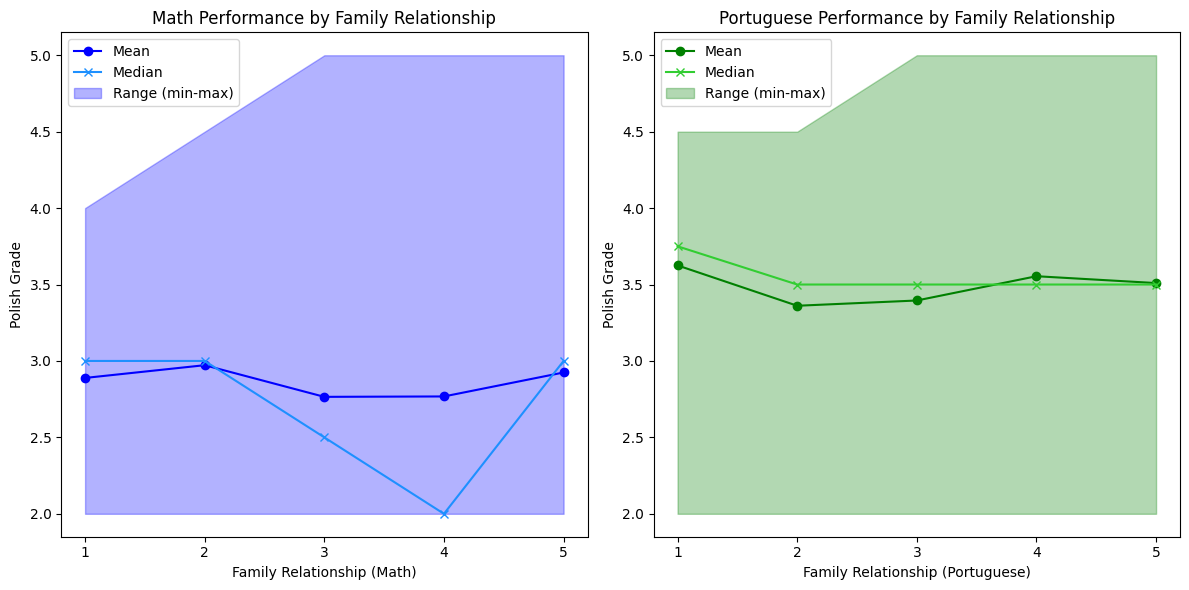

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(famrel_performance_math.index, famrel_performance_math['mean'], marker='o', label='Mean', color='blue')
plt.plot(famrel_performance_math.index, famrel_performance_math['median'], marker='x', label='Median', color='dodgerblue')
plt.fill_between(famrel_performance_math.index, famrel_performance_math['min'], famrel_performance_math['max'], color='blue', alpha=0.3, label='Range (min-max)')
plt.title('Math Performance by Family Relationship')
plt.xlabel('Family Relationship (Math)')
plt.ylabel('Polish Grade')
plt.legend()
plt.locator_params(axis='x', nbins=5)

plt.subplot(1, 2, 2)
plt.plot(famrel_performance_por.index, famrel_performance_por['mean'], marker='o', label='Mean', color='green')
plt.plot(famrel_performance_por.index, famrel_performance_por['median'], marker='x', label='Median', color='limegreen')
plt.fill_between(famrel_performance_por.index, famrel_performance_por['min'], famrel_performance_por['max'], color='green', alpha=0.3, label='Range (min-max)')
plt.title('Portuguese Performance by Family Relationship')
plt.xlabel('Family Relationship (Portuguese)')
plt.ylabel('Polish Grade')
plt.legend()
plt.locator_params(axis='x', nbins=5)

plt.tight_layout()
plt.show()

In both Math and Portuguese, we can observe that maximum final grades tend to increase with better family relationships. In Math, students with a 'very bad' (1) family relationship have a maximum of 4.0, those with a 'bad' (2) relationship reach 4.5, and the maximum grade reaches 5.0 starting from an 'average' (3) family relationship, staying there for better relationships. A similar trend is seen in Portuguese: students from 'very bad' (1) and 'bad' (2) family relationship groups reach a maximum of 4.5, while groups with better relationships have a maximum of 5.0.  
The means and medians are much less informative in this case, but relationship between performance and quality of family relationship can be seen due to maximums.

### 2. Does having the access to internet affects the students grades and his/her desire to pursue higher education?

Let's examine how internet access affects student performance.  
I will again use min, max, median, and mean to capture the extremes, central tendency, and overall trends in performance. 

In [13]:
internet_performance_math = students_df.groupby('internet')['G3_math_polgrd'].agg(['min', 'max', 'median', 'mean'])
print("Math Performance Based on Internet Access:")
print(internet_performance_math)

internet_performance_por = students_df.groupby('internet')['G3_por_polgrd'].agg(['min', 'max', 'median', 'mean'])
print("\nPortuguese Performance Based on Internet Access:")
print(internet_performance_por)

Math Performance Based on Internet Access:
          min  max  median      mean
internet                            
no        2.0  4.5     2.0  2.586207
yes       2.0  5.0     3.0  2.865741

Portuguese Performance Based on Internet Access:
          min  max  median      mean
internet                            
no        2.0  5.0     3.5  3.353448
yes       2.0  5.0     3.5  3.533951


In both Math and Portuguese, students with internet access tend to perform better on average. In Math, the maximum (4.5→5.0), mean (2.59→2.86), and especially the median (2.0→3.0) are higher for students with internet access, suggesting a strong benefit from online resources. In Portuguese, the median stays at 3.5 and the maximum remains at 5.0 in both groups, while the mean grows more slowly (3.35→3.53), indicating a weaker benefit from internet access.

Let's examine how internet access affects the desire for higher education by simply counting students based on their internet access and interest in higher education.

In [14]:
internet_higher_math = students_df.groupby(['internet', 'higher_math']).size().reset_index(name='count')
internet_higher_por = students_df.groupby(['internet', 'higher_por']).size().reset_index(name='count')

internet_higher_math = internet_higher_math.pivot(index='internet', columns='higher_math', values='count')
internet_higher_por = internet_higher_por.pivot(index='internet', columns='higher_por', values='count')

print("Math Students: Desire for Higher Education Based on Internet Access:")
print(internet_higher_math)

print("\nPortuguese Students: Desire for Higher Education Based on Internet Access:")
print(internet_higher_por)

Math Students: Desire for Higher Education Based on Internet Access:
higher_math  no  yes
internet            
no            2   56
yes          16  308

Portuguese Students: Desire for Higher Education Based on Internet Access:
higher_por  no  yes
internet           
no           2   56
yes         16  308


Firstly, there is no significant difference between these two tables, so it is enough to analize just one of them. Secondly, despite any potential misconceptions, let's calculate the percentage of students not pursuing education in both groups with and without internet access:

In [15]:
internet_higher_math['no_percentage'] = internet_higher_math['no'] / internet_higher_math.sum(axis=1) * 100

print("Percentage of students not pursuing higher education:")
print(internet_higher_math[['no_percentage']])

Percentage of students not pursuing higher education:
higher_math  no_percentage
internet                  
no                3.448276
yes               4.938272


The percentage of students not pursuing higher education in the dataset shows that students with internet access actually have a higher percentage (4.94%) of not pursuing higher education compared to those without internet access (3.45%). This suggests that the assumption of poorer upbringing influencing higher education desire may not hold true in this case, as internet access doesn't seem to be a significant factor in this decision.

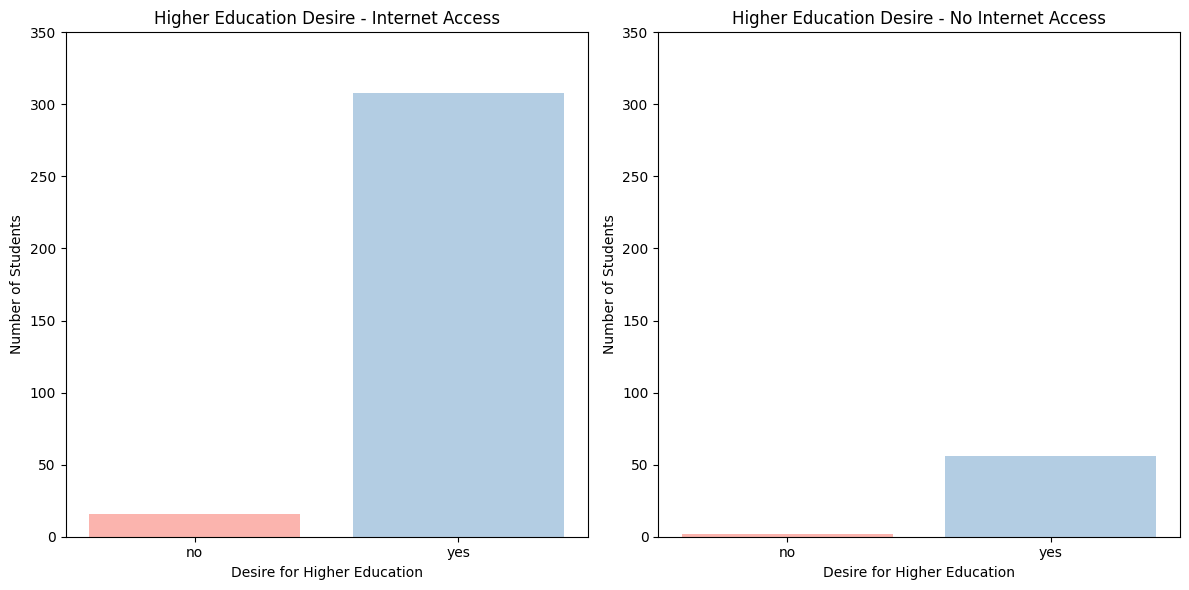

In [16]:
#delete only if internet_higher_math has this column
if 'no_percentage' in internet_higher_math.columns:
    internet_higher_math = internet_higher_math.drop(columns=['no_percentage'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(internet_higher_math.columns, internet_higher_math.loc['yes'], color=plt.cm.Pastel1(range(len(internet_higher_math.columns))))
plt.title('Higher Education Desire - Internet Access')
plt.xlabel('Desire for Higher Education')
plt.ylabel('Number of Students')
plt.ylim(0, 350)

plt.subplot(1, 2, 2)
plt.bar(internet_higher_math.columns, internet_higher_math.loc['no'], color=plt.cm.Pastel1(range(len(internet_higher_math.columns))))
plt.title('Higher Education Desire - No Internet Access')
plt.xlabel('Desire for Higher Education')
plt.ylabel('Number of Students')
plt.ylim(0, 350)

plt.tight_layout()
plt.show()